# Péndulo doble

In [2]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
import sympy as sym

In [3]:
np.random.uniform(0.01,np.pi)

0.9979073345014444

In [24]:
# Iniciañlozar las características del sistema
g = 9.8       # Gravedad de la Tierra
l1 = 0.5     # Longitud del primer péndulo
l2 = 0.3      # Longitud del segundo péndulo
m1 = 0.8      # Masa del primer péndulo en kg
m2 = 0.4      # Masa del segundo péndulo en kg

In [33]:
def PenduloDoble(t, arreglo):
    theta1 = arreglo[0]
    theta2 = arreglo[1]
    v1 = arreglo[2]
    v2 = arreglo[3]
    p1=(-g*(2*m1+m2)*np.sin(theta1)-m2*g*np.sin(theta1-2*theta2)-2*np.sin(theta1-theta2)*m2*(v2**2*l2+v1*l1*np.cos(theta1-theta2)))/(l1*(2*m1+m2-m2*np.cos(2*theta1-2*theta2)))
    p2=(2*np.sin(theta1-theta2)*(v1**2*l1*(m1+m2)+g*(m1+m2)*np.cos(theta1)+v2**2*l2*m2*np.cos(theta1-theta2)))/(l2*(2*m1+m2-m2*np.cos(2*theta1-2*theta2)))

    #p1 = ((-g*((2*m1) + m2)*np.sin(theta1)) - (m2*g*np.sin(theta1 - (2*theta2))) - (2*np.sin(theta1 - theta2)*m2*(((v2**2)*l2) + ((v1**2)*l1*np.cos(theta1 - theta2))))) / (l1*((2*m1) + m2 - (m2*np.cos((2*theta1) - (2*theta2)))))
    #p2 = (((2*np.sin(theta1 - theta2))*((v1**2)*l1*(m1 + m2))) + (g*(m1 + m2)*np.cos(theta1)) + ((v2**2)*l2*m2*np.cos(theta1-theta2))) / (l2*((2*m1) + m2 - (m2*np.cos((2*theta1) - (2*theta2)))))
    return np.array([v1,v2,p1,p2])

In [20]:
solve_ivp?

In [34]:
t = (0,20)
arreglo = []
theta1 = np.random.uniform(0.01,np.pi)
theta2 = theta1 + 0.002
v1 = np.random.uniform(0,2)
v2 = v1 + 0.001
arreglo.append(theta1)
arreglo.append(theta2)
arreglo.append(v1)
arreglo.append(v2)
arreglo

[0.33911271941102683,
 0.34111271941102683,
 1.6717679310230666,
 1.6727679310230665]

In [35]:
solucion = solve_ivp(PenduloDoble, t, np.array(arreglo), max_step = 0.0001)
solucion

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1200008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000e+00, 1.00000e-04, 2.00000e-04, ..., 1.99999e+01,
       2.00000e+01, 2.00000e+01])
 t_events: None
        y: array([[ 0.33911272,  0.33927986,  0.33944694, ...,  0.33133479,
         0.33118532,  0.33118532],
       [ 0.34111272,  0.34128   ,  0.34144727, ...,  0.44762946,
         0.44753906,  0.44753906],
       [ 1.67176793,  1.67111797,  1.67046769, ..., -1.49439527,
        -1.49493234, -1.49493234],
       [ 1.67276793,  1.67275701,  1.67274609, ..., -0.90372445,
        -0.90432771, -0.90432771]])
 y_events: None

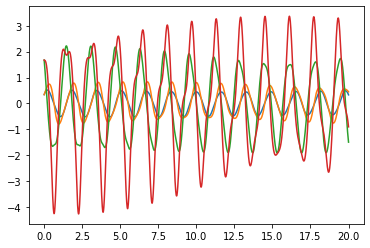

In [37]:
plt.plot(solucion.t,solucion.y.T)

In [38]:
solucion.y.T

array([[ 0.33911272,  0.34111272,  1.67176793,  1.67276793],
       [ 0.33927986,  0.34128   ,  1.67111797,  1.67275701],
       [ 0.33944694,  0.34144727,  1.67046769,  1.67274609],
       ...,
       [ 0.33133479,  0.44762946, -1.49439527, -0.90372445],
       [ 0.33118532,  0.44753906, -1.49493234, -0.90432771],
       [ 0.33118532,  0.44753906, -1.49493234, -0.90432771]])